# **Sales Predictions** 
Kassandra Howard

### **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [103]:
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)




### **Loading Data**

In [3]:
sales_predictions = pd.read_csv(r'C:\Users\dhowa\Downloads\sales_predictions - sales_predictions.csv')

In [4]:
sales_predictions.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
sales_predictions2 = sales_predictions.copy()

In [6]:
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# **Data Cleaning**

How many rows and Columns

In [7]:
sales_predictions.shape

(8523, 12)



*   There are 8523 rows, 12 columns
  



Checking the data types

In [8]:
 data_types = sales_predictions.dtypes
 data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

There are 3 different data types object, float64, and int64.
All other data is how it should be.

This shows all the objects in the data.

In [9]:
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [10]:
 for col in str_cols:
   print(f'- {col}:')
   print(sales_predictions[col].value_counts(dropna=False))
   print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

The Item Fat Content had incorrect spelling in the value.

In [11]:
sales_predictions['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
sales_predictions.replace(['low fat','LF'], ['Low Fat', 'Low Fat'], inplace = True)
sales_predictions.replace({'low fat': 'Low Fat', 'LF': 'Low Fat'}, inplace = True)

In [13]:
sales_predictions.replace(['reg'], ['Regular'], inplace = True)

In [14]:
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Check to see if this data set had any duplicates.

In [15]:
sales_predictions.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [16]:
sales_predictions.duplicated().sum()

0

In this data set there are not any duplicates.

In [17]:
sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are two iteams that have missing data.

In [18]:
sales_predictions.isna().sum() / len(sales_predictions) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Missing Values 


*   There are 1,463 missing values in item weight column.(17%)

*   There are 2,410 values in outlet size missing. (28%)



In [19]:
sales_predictions.dropna(inplace=True)

In [20]:
sales_predictions['Outlet_Size'].value_counts()

Small     1860
Medium    1858
High       932
Name: Outlet_Size, dtype: int64

In [21]:
sales_predictions.replace(['High'], ['Large'], inplace = True)
sales_predictions.replace({'High': 'Large'}, inplace = True)

In [22]:
sales_predictions['Outlet_Size'].value_counts()

Small     1860
Medium    1858
Large      932
Name: Outlet_Size, dtype: int64



*   Replace the missing values with fillna and median




In [23]:
most_common_size = sales_predictions['Outlet_Size'].mode()
sales_predictions['Outlet_Size'].fillna(most_common_size, inplace=True)

In [24]:
Item_Weight_mean = sales_predictions['Item_Weight'].mean()
Item_Weight_max = sales_predictions['Item_Weight'].max()
Item_Weight_min = sales_predictions['Item_Weight'].min()
Item_Weight_mean
Item_Weight_max
Item_Weight_min

4.555

In [25]:
median_weight = sales_predictions['Item_Weight'].median()
sales_predictions['Item_Weight'].fillna(median_weight, inplace=True)
sales_predictions.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
sales_predictions.describe().round(2)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
count      4650.00          4650.00   4650.00                    4650.00   
mean         12.90             0.06    141.72                    1999.19   
std           4.67             0.04     62.42                       7.39   
min           4.56             0.00     31.49                    1987.00   
25%           8.77             0.03     94.41                    1997.00   
50%          12.65             0.05    142.98                    1999.00   
75%          17.00             0.09    186.61                    2004.00   
max          21.35             0.19    266.89                    2009.00   

       Item_Outlet_Sales  
count            4650.00  
mean             2272.04  
std              1497.96  
min                69.24  
25%              1125.20  
50%              1939.81  
75%              3111.62  
max             10256.65

In [27]:
stats = sales_predictions.describe()
stats.loc[['mean','min','max']]

Item_Weight  Item_Visibility    Item_MRP  Outlet_Establishment_Year  \
mean    12.898675         0.060700  141.716328                1999.190538   
min      4.555000         0.000000   31.490000                1987.000000   
max     21.350000         0.188323  266.888400                2009.000000   

      Item_Outlet_Sales  
mean        2272.037489  
min           69.243200  
max        10256.649000

# **Inspecting Item Outlet Sales**

In [28]:
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

C:\Users\dhowa\AppData\Local\Temp\ipykernel_14900\3452536633.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
C:\Users\dhowa\AppData\Local\Temp\ipykernel_14900\3452536633.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


In [29]:
sales_predictions['Item_Outlet_Sales'].value_counts()

1342.2528    11
1438.1280    11
958.7520     10
703.0848     10
1845.5976     9
             ..
256.3330      1
3941.5360     1
3858.9768     1
5496.8448     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 2449, dtype: int64

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Count'>

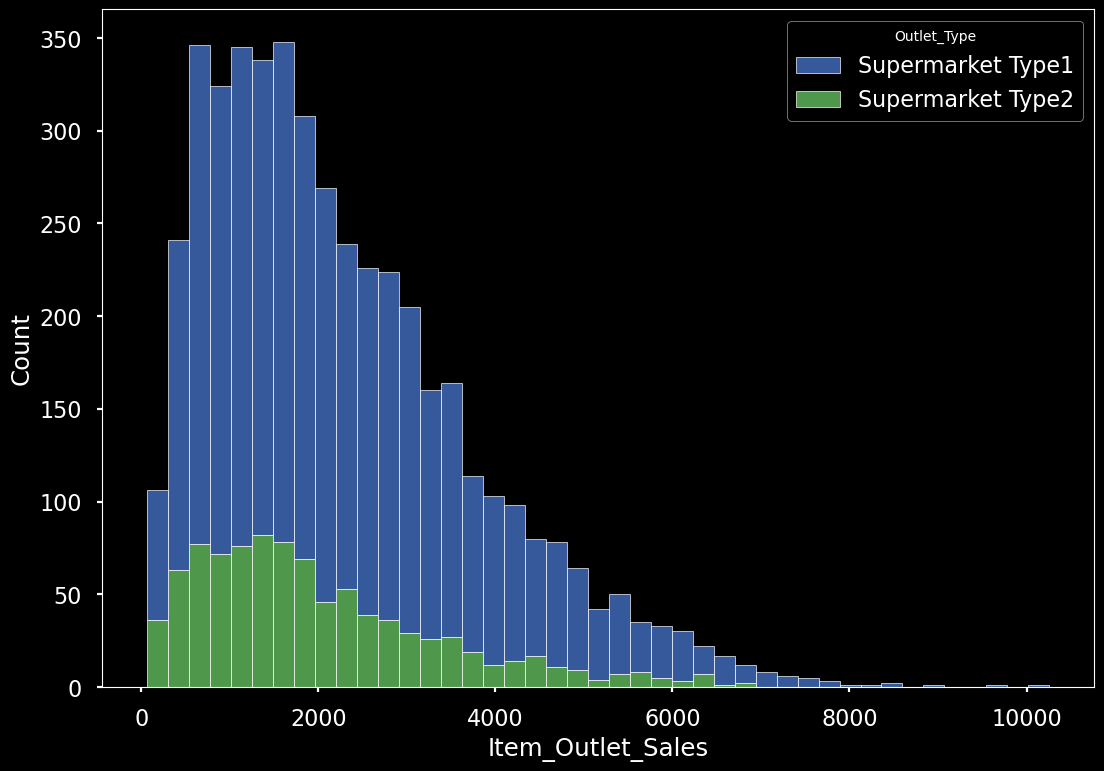

In [30]:
sns.histplot(data = sales_predictions, x= "Item_Outlet_Sales",hue = "Outlet_Type", multiple = "stack")

Supermarket Type 1 had high number of sales and a few in 10,000 catgeory. Supermarket Type 2 does not have the same sales as type 1. Supermarket does not have any values in the 10,000.

C:\Users\dhowa\AppData\Local\Temp\ipykernel_14900\867588924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_predictions.corr(),cmap = 'coolwarm', annot= True, fmt= '2f')


<AxesSubplot: >

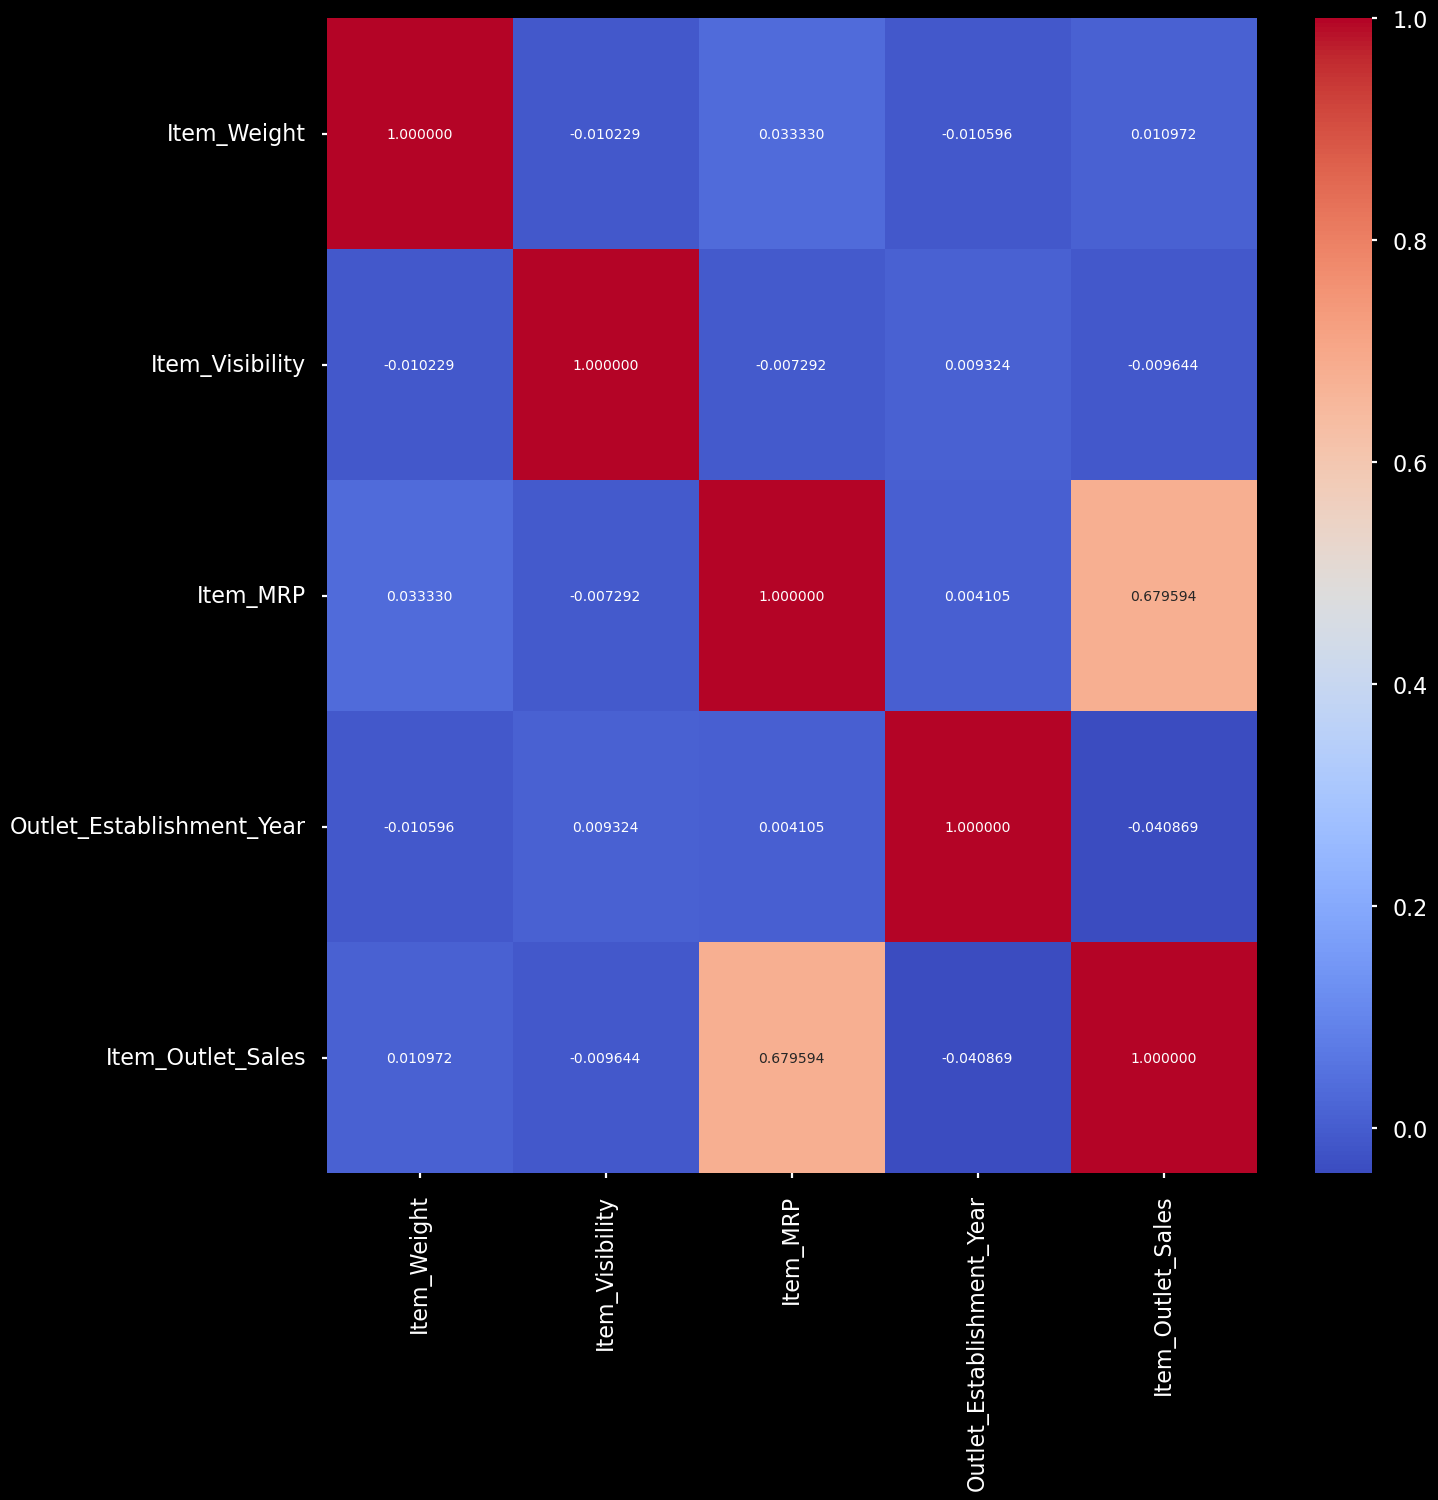

In [31]:
plt.figure(figsize= (15,15))
sns.heatmap(sales_predictions.corr(),cmap = 'coolwarm', annot= True, fmt= '2f')

This graph show the potential correlations with Item Outlet Sales.


1.   Item MRP
2.   Item Visibility
3.   Establishment Year






<AxesSubplot: title={'center': 'Item_Outlet_Sales'}, xlabel='Outlet_Type'>

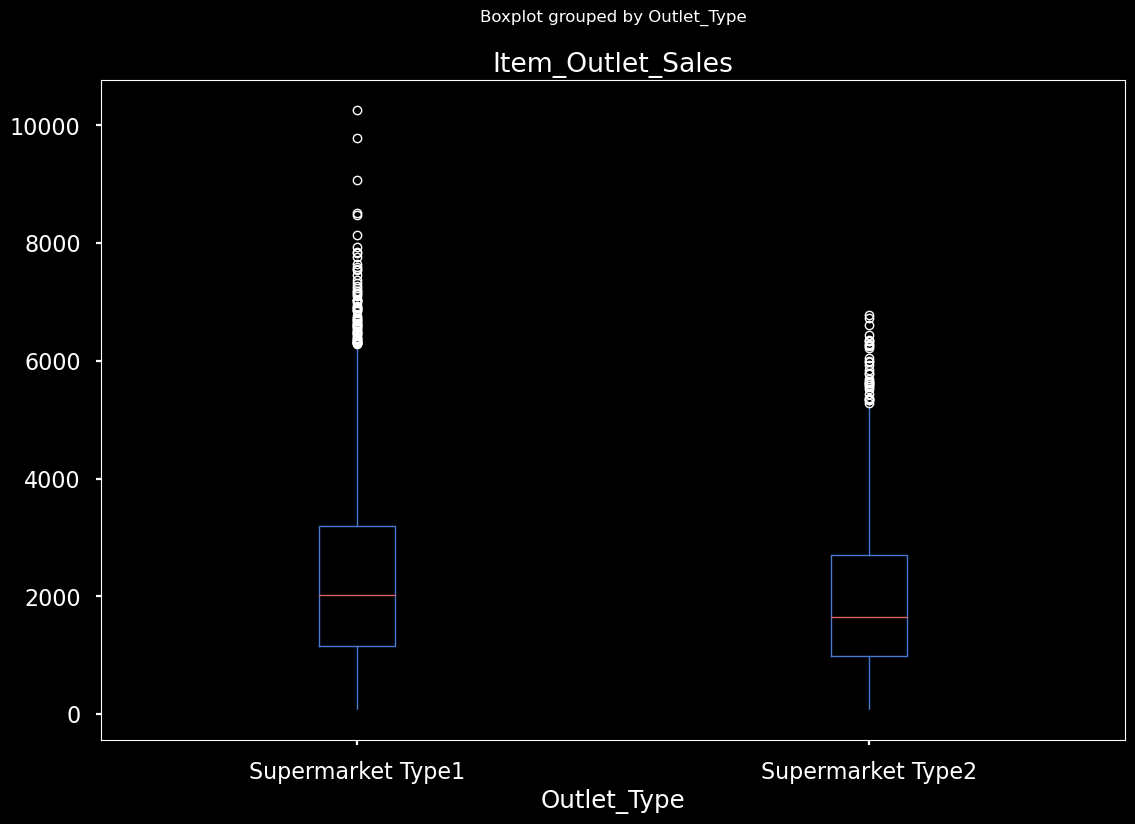

In [32]:
sales_predictions.boxplot(by='Outlet_Type', column='Item_Outlet_Sales', grid=False)

Supermarket Type 1 is over 50% in sales and supermarket 2 is right at 50% in sales.

# The items that sold the most 


*   Which items had the most visibilty 
*   Which food items  sold the most







In [33]:
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


In [34]:
means = sales_predictions.groupby('Item_Type')['Item_Visibility'].mean().sort_values(ascending=False)
means

Item_Type
Seafood                  0.076063
Breakfast                0.074611
Dairy                    0.066709
Starchy Foods            0.064550
Canned                   0.063863
Breads                   0.061970
Snack Foods              0.061934
Frozen Foods             0.061808
Fruits and Vegetables    0.061589
Baking Goods             0.060733
Hard Drinks              0.059529
Soft Drinks              0.058806
Meat                     0.058088
Household                0.056251
Others                   0.050557
Health and Hygiene       0.050321
Name: Item_Visibility, dtype: float64

C:\Users\dhowa\AppData\Local\Temp\ipykernel_14900\3840124004.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=sales_predictions,x='Item_Type',


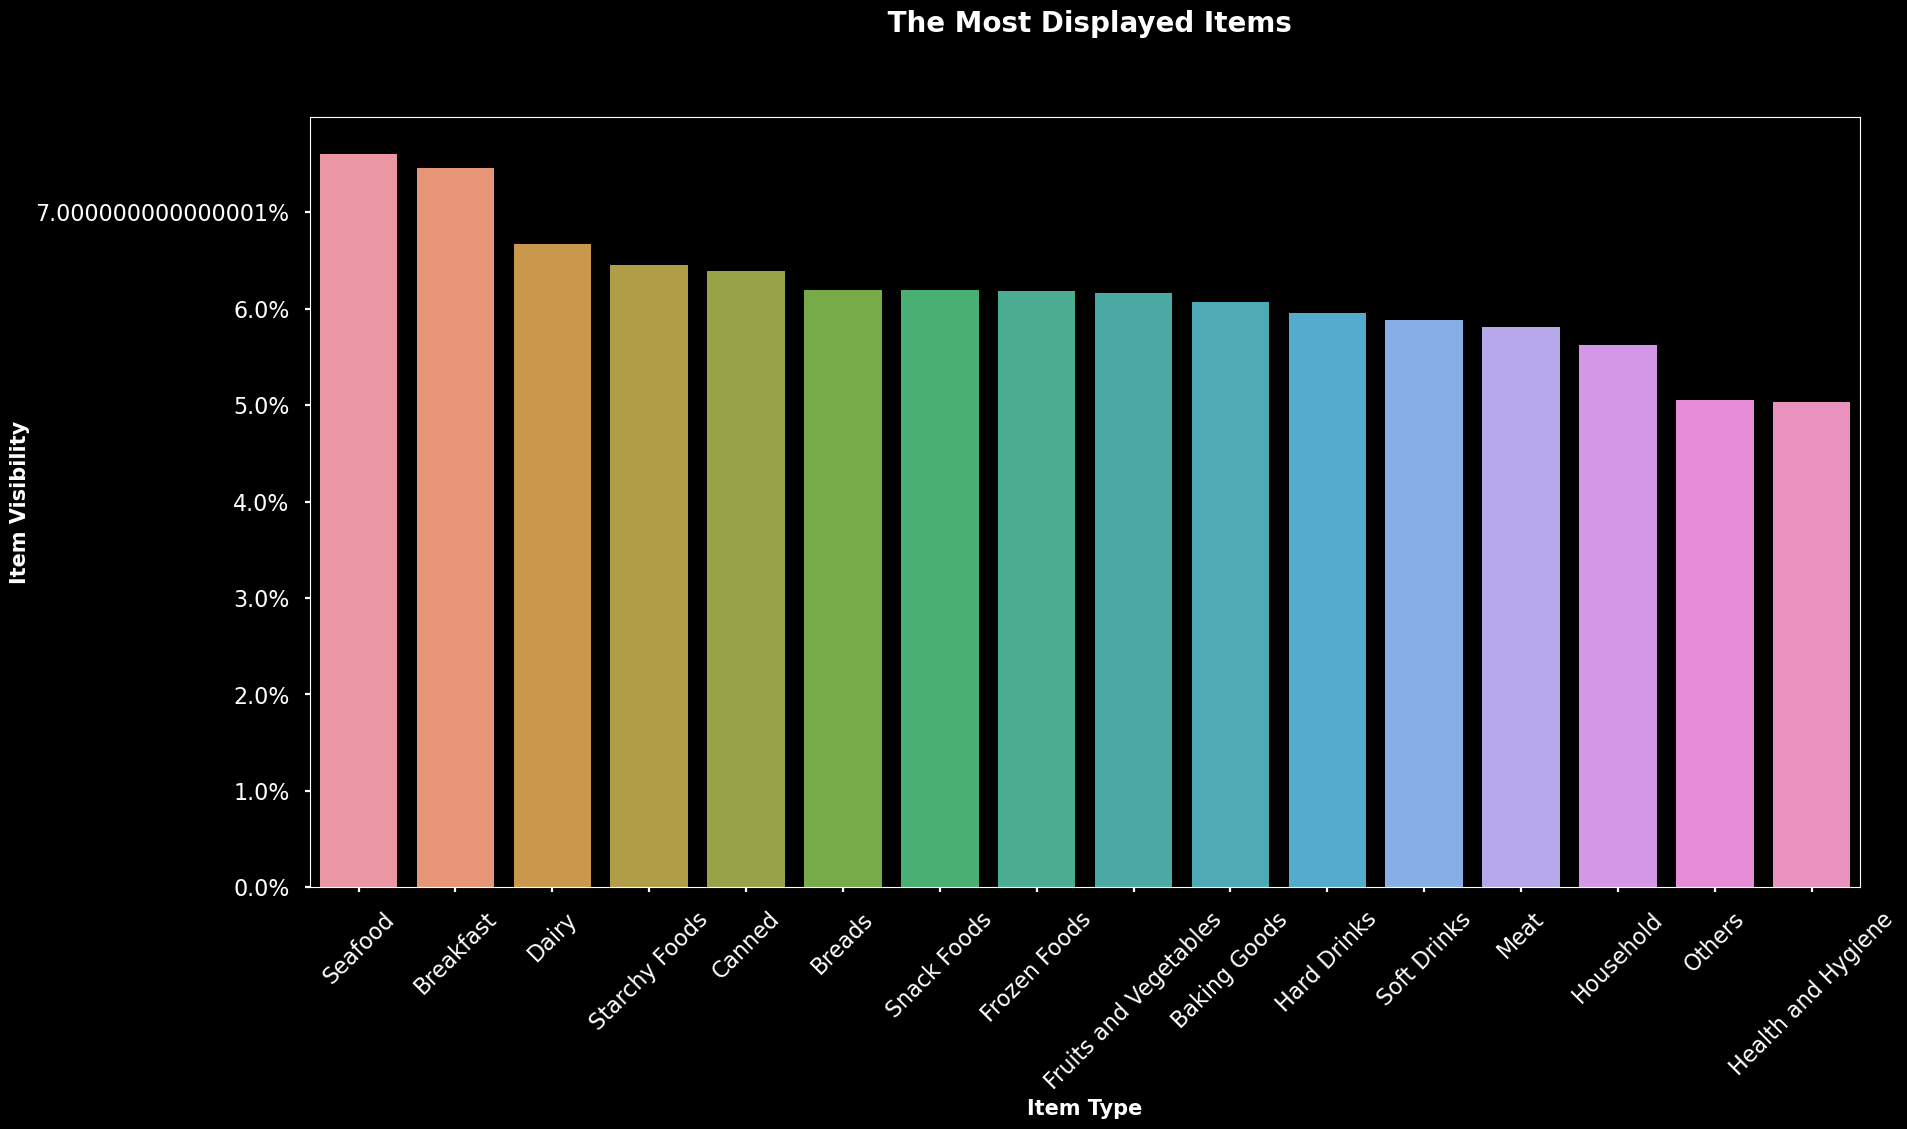

In [35]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=sales_predictions,x='Item_Type', 
                 y = 'Item_Visibility', 
                 order = means.index, 
                 ci = None)
plt.xticks(rotation = 45)
ax.set_title(' The Most Displayed Items', 
             fontsize = 20, 
             fontweight = 'bold',
             y=1.1);
ax.set_xlabel('Item Type', 
              fontsize = 15, 
              fontweight = 'bold')
ax.set_ylabel('Item Visibility', 
              fontsize = 15, 
              fontweight = 'bold');

def one_percent(x,pos):
  """function for use with matplotlib FuncFormatter - format item visibility in percentage"""
  return f'{x*100}%'


price_fmt_percent = FuncFormatter(one_percent)

ax.yaxis.set_major_formatter(price_fmt_percent)

**The Items that had the most visibilty **


*   Seafood
*   Breakfast

**The items that had the lesat**


*   Health and Hygiene
*   Others





In [36]:
means2 = sales_predictions.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means2

Item_Type
Seafood                  2782.236970
Starchy Foods            2483.778379
Snack Foods              2391.146609
Breads                   2389.702474
Household                2386.554752
Dairy                    2337.420556
Fruits and Vegetables    2312.703005
Meat                     2250.096708
Hard Drinks              2233.275299
Frozen Foods             2222.011887
Canned                   2205.210750
Breakfast                2203.166638
Others                   2194.191457
Health and Hygiene       2138.071282
Soft Drinks              2050.338007
Baking Goods             2046.798187
Name: Item_Outlet_Sales, dtype: float64

C:\Users\dhowa\AppData\Local\Temp\ipykernel_14900\3365504545.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=sales_predictions,x='Item_Type', y = 'Item_Outlet_Sales', order = means2.index, ci = None)


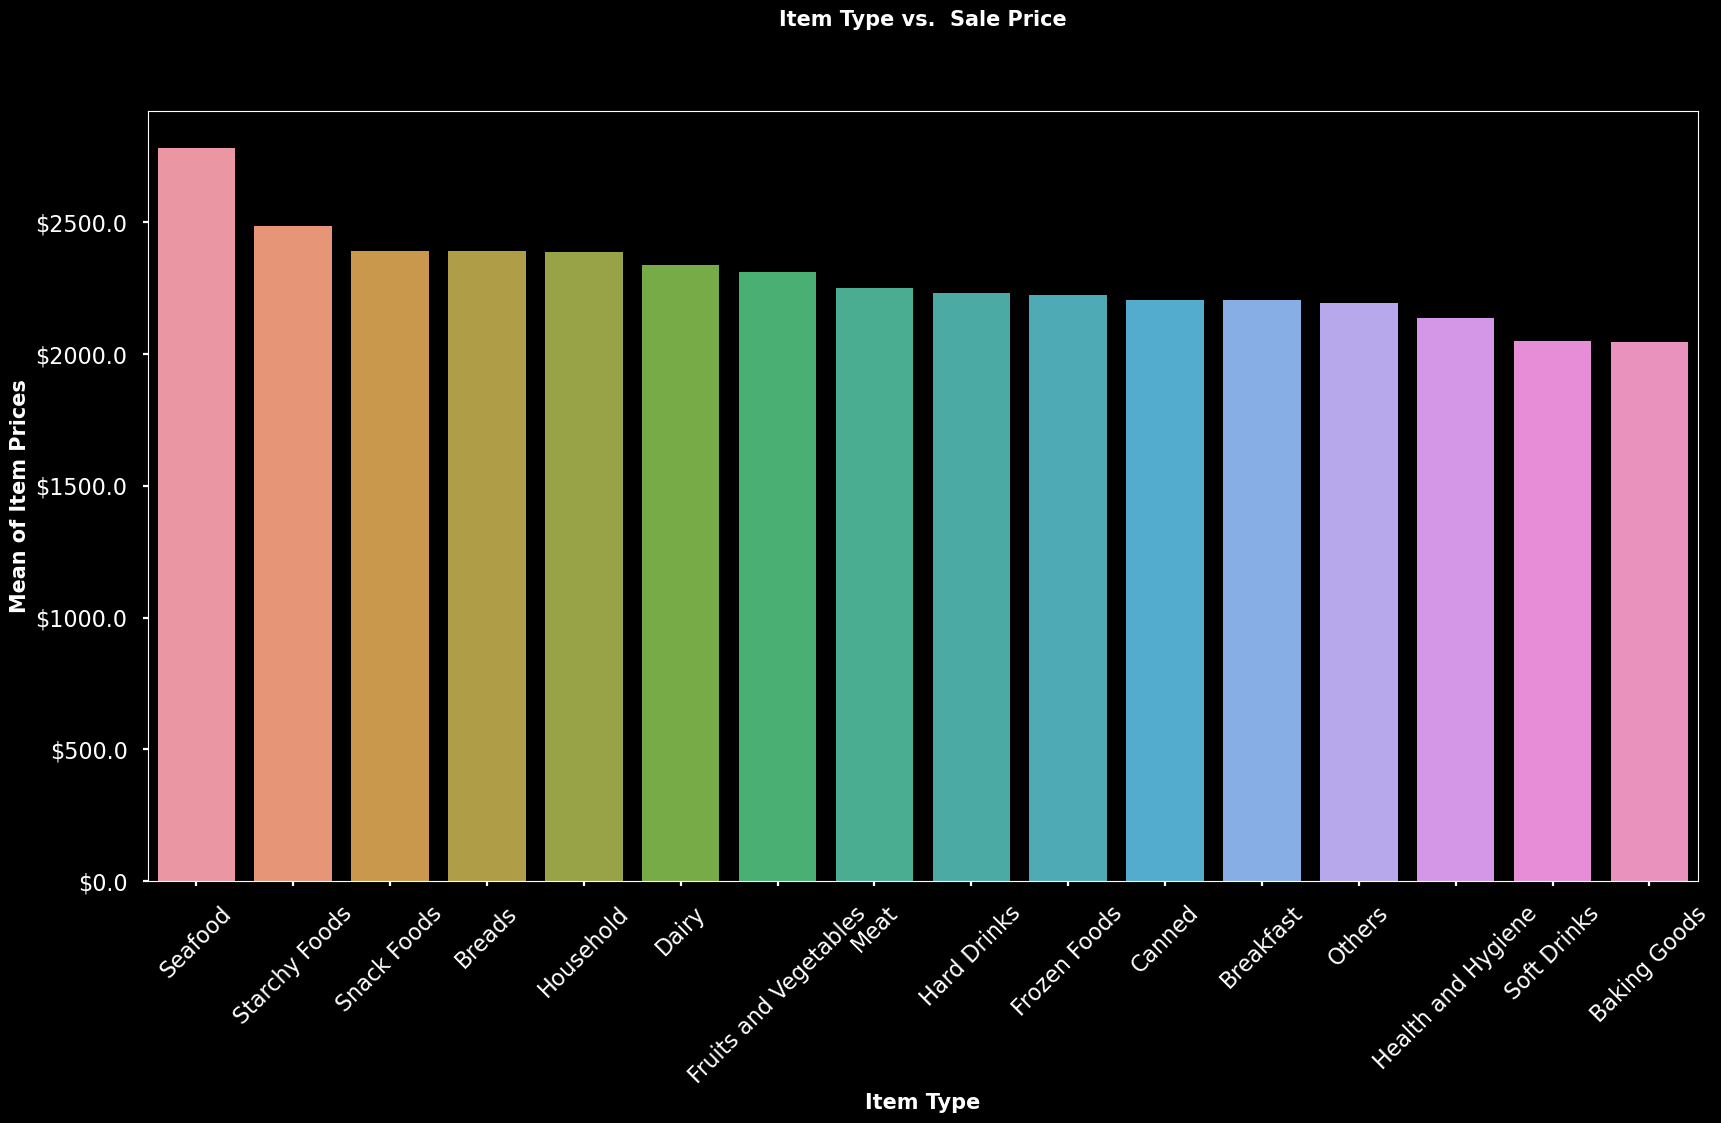

In [37]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=sales_predictions,x='Item_Type', y = 'Item_Outlet_Sales', order = means2.index, ci = None)
plt.xticks(rotation = 45)
ax.set_title('Item Type vs.  Sale Price', 
             fontsize = 15, 
             fontweight = 'bold',
             y=1.1);
ax.set_xlabel('Item Type', 
              fontsize = 15, 
              fontweight = 'bold')
ax.set_ylabel('Mean of Item Prices', 
              fontsize = 15, 
              fontweight = 'bold');

def one_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in thousands"""
  return f'${x}'

price_fmt_1k = FuncFormatter(one_k)

ax.yaxis.set_major_formatter(price_fmt_1k)

**The items that were sold**


*   Seafood 
*   Starchy Foods

**The Items sold the least**



*   Soft Drinks
*   Baking Goods




# **Preprocesing for Machine Learning**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
     

In [39]:
sales_predictions2.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

Going to drop the column item identifier as it does not add any value to the data testing set.

In [40]:
sales_predictions2.drop(columns = 'Item_Identifier', axis = 1, inplace = True)
sales_predictions2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [41]:
sales_predictions2.duplicated().sum()

0

In [42]:
sales_predictions2.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Change Outlet size to ordinal catgoery so we do not have data leakage.

In [43]:
sales_predictions2['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2}, inplace=True)
sales_predictions2['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

The Outlet Sales is going to be our target.

In [44]:
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
target = 'Item_Outlet_Sales'

X = sales_predictions2.drop(columns=target).copy()
y = sales_predictions2[target].copy()
X.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092            OUT049                       1999          1.0   
1   48.2692            OUT018                       2009          1.0   
2  141.6180            OUT049                       1999          1.0   
3  182.0950            OUT010                       1998          NaN   
4   53.8614            OUT013                       1987          2.0   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 3  Supermarket Type2  
2               Tier 1  Supermarket Type1  
3               Tier 3      Grocery Store  
4               Tier 3  Supermarket Type1

**The Test Train split**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()


Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
8269        7.220          Regular         0.064142           Baking Goods   
7604        6.135               LF         0.079294            Soft Drinks   
2762       12.150          Low Fat         0.028593              Household   
6464        5.945               LF         0.093009              Household   
4707       18.200          Regular         0.066285  Fruits and Vegetables   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
8269   61.2510            OUT010                       1998          NaN   
7604  111.2860            OUT018                       2009          1.0   
2762  151.0708            OUT035                       2004          0.0   
6464  127.8652            OUT035                       2004          0.0   
4707  247.2092            OUT035                       2004          0.0   

     Outlet_Location_Type        Outlet_Type  
8269               Tier 3      Grocery Store  
7604               Tier 3  Supermarket Type2  
2762               Tier 2  Supermarket Type1  
6464               Tier 2  Supermarket Type1  
4707               Tier 2  Supermarket Type1

In [48]:
## make categorical selector and verify it works 
cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type']

In [49]:
## make numeric selector and verify it works 
num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Size']

In [50]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))



In [51]:
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),                                      
                                       verbose_feature_names_out=False)
preprocessor



ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001FFF5CD1670>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001FFF5CD1100>)],
                  verbose_feature_names_out=False)

In [52]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
  

In [53]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
8269        7.220         0.064142   61.2510                     1998.0   
7604        6.135         0.079294  111.2860                     2009.0   
2762       12.150         0.028593  151.0708                     2004.0   

      Outlet_Size  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
8269     0.760582                  0.0                       0.0   
7604     1.000000                  1.0                       0.0   
2762     0.000000                  0.0                       1.0   

      Item_Fat_Content_Regular  Item_Fat_Content_low fat  \
8269                       1.0                       0.0   
7604                       0.0                       0.0   
2762                       0.0                       0.0   

      Item_Fat_Content_reg  Item_Type_Baking Goods  Item_Type_Breads  \
8269                   0.0                     1.0               0.0   
7604                   0.0                     0.0               0.0   
2762                   0.0                     0.0               0.0   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
8269                  0.0               0.0              0.0   
7604                  0.0               0.0              0.0   
2762                  0.0               0.0              0.0   

      Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
8269                     0.0                              0.0   
7604                     0.0                              0.0   
2762                     0.0                              0.0   

      Item_Type_Hard Drinks  Item_Type_Health and Hygiene  \
8269                    0.0                           0.0   
7604                    0.0                           0.0   
2762                    0.0                           0.0   

      Item_Type_Household  Item_Type_Meat  Item_Type_Others  \
8269                  0.0             0.0               0.0   
7604                  0.0             0.0               0.0   
2762                  1.0             0.0               0.0   

      Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
8269                0.0                    0.0                    0.0   
7604                0.0                    0.0                    1.0   
2762                0.0                    0.0                    0.0   

      Item_Type_Starchy Foods  Outlet_Identifier_OUT010  \
8269                      0.0                       1.0   
7604                      0.0                       0.0   
2762                      0.0                       0.0   

      Outlet_Identifier_OUT013  Outlet_Identifier_OUT017  \
8269                       0.0                       0.0   
7604                       0.0                       0.0   
2762                       0.0                       0.0   

      Outlet_Identifier_OUT018  Outlet_Identifier_OUT019  \
8269                       0.0                       0.0   
7604                       1.0                       0.0   
2762                       0.0                       0.0   

      Outlet_Identifier_OUT027  Outlet_Identifier_OUT035  \
8269                       0.0                       0.0   
7604                       0.0                       0.0   
2762                       0.0                       1.0   

      Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
8269                       0.0                       0.0   
7604                       0.0                       0.0   
2762                       0.0                       0.0   

      Outlet_Identifier_OUT049  Outlet_Location_Type_Tier 1  \
8269                       0.0                          0.0   
7604                       0.0                          0.0   
2762                       0.0                          0.0   

      Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
8269                          0.0                          1.0   
7604   

In [54]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
8077        15.25         0.061531  132.2968                     2007.0   
2391        17.85         0.044463  127.1020                     1997.0   
163          7.27         0.071078  114.2518                     1997.0   

      Outlet_Size  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
8077     0.760582                  0.0                       1.0   
2391     0.000000                  0.0                       1.0   
163      0.000000                  0.0                       1.0   

      Item_Fat_Content_Regular  Item_Fat_Content_low fat  \
8077                       0.0                       0.0   
2391                       0.0                       0.0   
163                        0.0                       0.0   

      Item_Fat_Content_reg  Item_Type_Baking Goods  Item_Type_Breads  \
8077                   0.0                     0.0               0.0   
2391                   0.0                     0.0               0.0   
163                    0.0                     0.0               0.0   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
8077                  0.0               0.0              0.0   
2391                  0.0               0.0              0.0   
163                   0.0               0.0              0.0   

      Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
8077                     0.0                              0.0   
2391                     0.0                              0.0   
163                      0.0                              0.0   

      Item_Type_Hard Drinks  Item_Type_Health and Hygiene  \
8077                    0.0                           0.0   
2391                    0.0                           0.0   
163                     0.0                           0.0   

      Item_Type_Household  Item_Type_Meat  Item_Type_Others  \
8077                  1.0             0.0               0.0   
2391                  0.0             0.0               0.0   
163                   0.0             0.0               0.0   

      Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
8077                0.0                    0.0                    0.0   
2391                0.0                    1.0                    0.0   
163                 0.0                    0.0                    1.0   

      Item_Type_Starchy Foods  Outlet_Identifier_OUT010  \
8077                      0.0                       0.0   
2391                      0.0                       0.0   
163                       0.0                       0.0   

      Outlet_Identifier_OUT013  Outlet_Identifier_OUT017  \
8077                       0.0                       1.0   
2391                       0.0                       0.0   
163                        0.0                       0.0   

      Outlet_Identifier_OUT018  Outlet_Identifier_OUT019  \
8077                       0.0                       0.0   
2391                       0.0                       0.0   
163                        0.0                       0.0   

      Outlet_Identifier_OUT027  Outlet_Identifier_OUT035  \
8077                       0.0                       0.0   
2391                       0.0                       0.0   
163                        0.0                       0.0   

      Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
8077                       0.0                       0.0   
2391                       0.0                       1.0   
163                        0.0                       1.0   

      Outlet_Identifier_OUT049  Outlet_Location_Type_Tier 1  \
8077                       0.0                          0.0   
2391                       0.0                          1.0   
163                        0.0                          1.0   

      Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
8077                          1.0                          0.0   
2391   

In [55]:
## confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)

8077    1696.4584
2391    2024.0320
163     2618.5914
Name: Item_Outlet_Sales, dtype: float64

# Modeling - Linear Regression

In [83]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

#  Model 1: Baseline LinReg

In [85]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, 
                    X_test_df, y_test)

Get coefficients 

In [92]:
def get_coefficients(lin_reg):
    coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
    coeffs.loc['intercept'] = lin_reg.intercept_
    return coeffs


In [94]:
coeffs = get_coefficients(lin_reg)
coeffs


Item_Weight                        1.094575e+00
Item_Visibility                   -2.762776e+02
Item_MRP                           1.559670e+01
Outlet_Establishment_Year         -5.247672e+12
Outlet_Size                       -1.025089e+14
Item_Fat_Content_LF               -9.117140e+11
Item_Fat_Content_Low Fat          -9.117140e+11
Item_Fat_Content_Regular          -9.117140e+11
Item_Fat_Content_low fat          -9.117140e+11
Item_Fat_Content_reg              -9.117140e+11
Item_Type_Baking Goods             3.213268e+12
Item_Type_Breads                   3.213268e+12
Item_Type_Breakfast                3.213268e+12
Item_Type_Canned                   3.213268e+12
Item_Type_Dairy                    3.213268e+12
Item_Type_Frozen Foods             3.213268e+12
Item_Type_Fruits and Vegetables    3.213268e+12
Item_Type_Hard Drinks              3.213268e+12
Item_Type_Health and Hygiene       3.213268e+12
Item_Type_Household                3.213268e+12
Item_Type_Meat                     3.213

In [96]:
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option('display.max_rows', None)


In [98]:
coeffs.sort_values()

Outlet_Size                         -102,508,896,945,963.9531
Outlet_Identifier_OUT035             -58,232,531,831,428.8672
Outlet_Identifier_OUT046             -52,849,295,991,254.6094
Outlet_Identifier_OUT019             -52,649,103,119,819.4297
Outlet_Type_Grocery Store            -37,136,728,868,055.3750
Outlet_Location_Type_Tier 1          -35,792,596,194,718.0703
Outlet_Type_Supermarket Type3        -30,596,193,352,921.6250
Outlet_Identifier_OUT027             -29,416,134,078,716.9023
Outlet_Establishment_Year             -5,247,671,782,521.0547
Item_Fat_Content_reg                    -911,714,018,216.5868
Item_Fat_Content_LF                     -911,714,018,168.1309
Item_Fat_Content_Low Fat                -911,714,018,135.5316
Item_Fat_Content_Regular                -911,714,018,100.5016
Item_Fat_Content_low fat                -911,714,018,081.0464
Item_Visibility                                     -276.2776
Item_Weight                                            1.0946
Item_MRP

In [105]:
Item_Type_feats = [c for c in X_train_df.columns if c.startswith('Item_Type')]
len(Item_Type_feats)

16

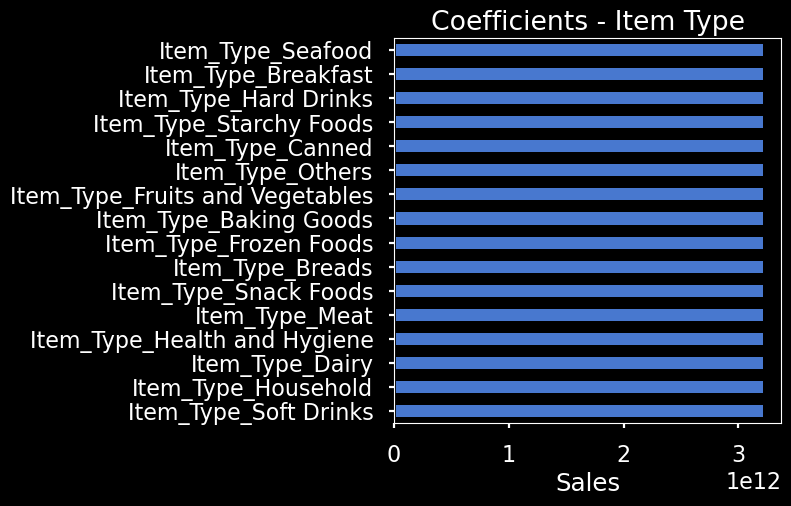

In [106]:
ax = coeffs[Item_Type_feats].sort_values().plot(kind='barh', figsize=(5,5))
ax.axvline(0, color='k')
ax.set(xlabel='Sales', title="Coefficients - Item Type");

FileNotFoundError: [Errno 2] No such file or directory: 'Data/coeffs.png'

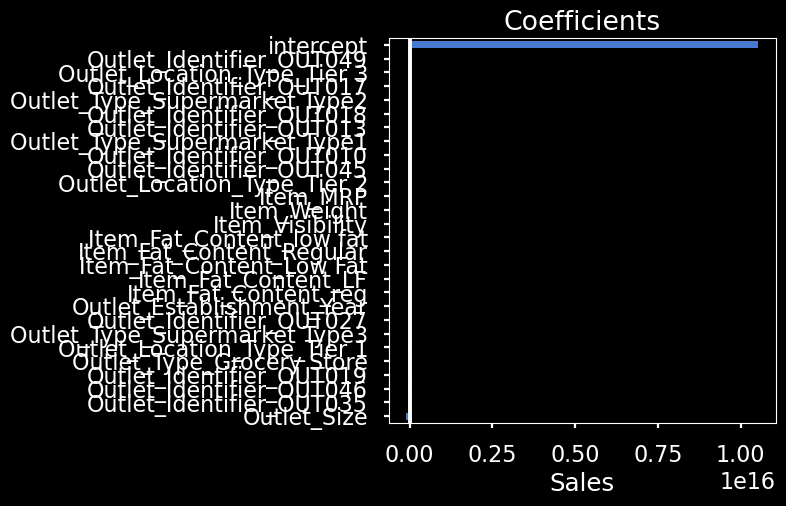

In [107]:
## Plot everything but item identifier
ax = coeffs.drop(Item_Type_feats).sort_values().plot(kind='barh', figsize=(5,5))
ax.axvline(0)
ax.set(xlabel='Sales', title="Coefficients");

plt.savefig('Data/coeffs.png')

# Tree-Based Model

In [108]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

In [109]:
importances = pd.Series(reg.feature_importances_, index= reg.feature_names_in_)
importances

Item_Weight                       0.0520
Item_Visibility                   0.0954
Item_MRP                          0.4419
Outlet_Establishment_Year         0.0285
Outlet_Size                       0.0082
Item_Fat_Content_LF               0.0031
Item_Fat_Content_Low Fat          0.0063
Item_Fat_Content_Regular          0.0055
Item_Fat_Content_low fat          0.0015
Item_Fat_Content_reg              0.0016
Item_Type_Baking Goods            0.0044
Item_Type_Breads                  0.0028
Item_Type_Breakfast               0.0025
Item_Type_Canned                  0.0041
Item_Type_Dairy                   0.0054
Item_Type_Frozen Foods            0.0057
Item_Type_Fruits and Vegetables   0.0081
Item_Type_Hard Drinks             0.0028
Item_Type_Health and Hygiene      0.0042
Item_Type_Household               0.0062
Item_Type_Meat                    0.0035
Item_Type_Others                  0.0016
Item_Type_Seafood                 0.0014
Item_Type_Snack Foods             0.0081
Item_Type_Soft D

FileNotFoundError: [Errno 2] No such file or directory: 'Data/importances.png'

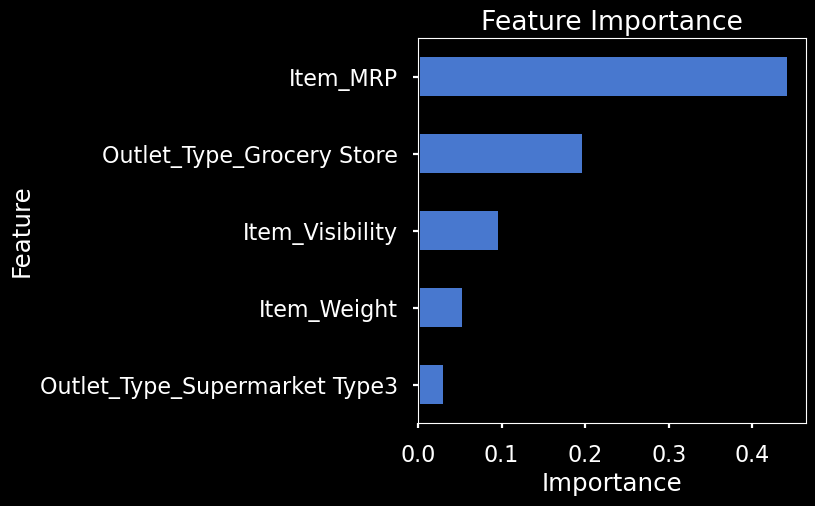

In [110]:
ax = importances.sort_values().tail(5).plot(kind='barh',figsize=(5,5))
ax.axvline(0, color='k')
ax.set(title='Feature Importance',ylabel="Feature",
      xlabel='Importance');

plt.savefig('Data/importances.png', bbox_inches="tight")

Top 5 most important features:

Item MRP

Item Market Retail Price are the most important factor for Sales.

Outlet Type Grocery Store

Grocery Store has better sales than other outlet types

Item Visibility

its important to have good visibility for selling items, better 

visibility more likely to engage with consumers and maximise sales.

Outlet Type Supermarket Type3

People are likely to go to type 3, it could be the interior design/ style 
of the supermarket or size tend to have more people like to go there.

Item Weight

Item Weights are matter so people could probably tend to do online delivery for heavier items.

# Serialize Our Best Model with Joblib

In [111]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

In [112]:
import joblib, os

## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train':y_train,
         'X_test':X_test_df,
         'y_test':y_test,
          'preprocessor':preprocessor,
          'RandomForestRegressor':reg}
joblib.dump(export, 'random_forest.joblib')

['random_forest.joblib']